In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import scipy.stats
import scipy.special
import sklearn.linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from src.logi_regression import logistic_fit, logistic_predictor, logistic_predict_proba
from src.svm_model import svc_fit, svc_predictor



ModuleNotFoundError: No module named 'src'

In [2]:
data2 = pd.read_csv("fraud_dectection.csv")
data2

,Unnamed: 0,Type,Type2,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud
0,0,PAYMENT,CM,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,CM,1864.28,21249.00,19384.72,0.00,0.00,0
2,2,TRANSFER,CC,181.00,181.00,0.00,0.00,0.00,1
3,3,CASH_OUT,CC,181.00,181.00,0.00,21182.00,0.00,1
4,4,PAYMENT,CM,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
6362615,6362615,CASH_OUT,CC,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,6362616,TRANSFER,CC,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,6362617,CASH_OUT,CC,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,6362618,TRANSFER,CC,850002.52,850002.52,0.00,0.00,0.00,1


In [3]:
data2 = data2.drop(columns= 'Unnamed: 0')
data2.head()

,Type,Type2,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud
0,PAYMENT,CM,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,CM,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,CC,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,CC,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,CM,11668.14,41554.0,29885.86,0.0,0.0,0


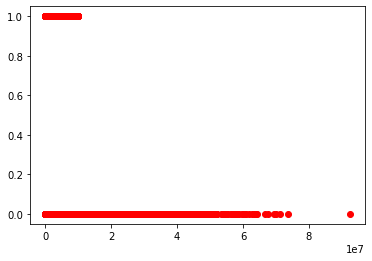

In [4]:
plt.scatter(data2.Amount,data2.Fraud, color = 'red')

In [5]:
type1 = pd.get_dummies(data2['Type'], drop_first = True)
type2=  pd.get_dummies(data2['Type2'], drop_first = True)

In [6]:
type1.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [7]:
type2.head()

,CM
0,1
1,1
2,0
3,0
4,1


In [8]:
data2['Type2'].unique()

array(['CM', 'CC'], dtype=object)

In [9]:
data3 = pd.get_dummies(data2, prefix = ['Type', 'Type2'], drop_first = True)
data3

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0,1
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0,1
2,181.00,181.00,0.00,0.00,0.00,1,0,0,0,1,0
3,181.00,181.00,0.00,21182.00,0.00,1,1,0,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,1,0,0,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,1,0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1,0,0,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,1,0


In [10]:
data3[data3['Fraud'] ==0]

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
0,9839.64,170136.0,160296.36,0.00,0.00,0,0,0,1,0,1
1,1864.28,21249.0,19384.72,0.00,0.00,0,0,0,1,0,1
4,11668.14,41554.0,29885.86,0.00,0.00,0,0,0,1,0,1
5,7817.71,53860.0,46042.29,0.00,0.00,0,0,0,1,0,1
6,7107.77,183195.0,176087.23,0.00,0.00,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6362319,8634.29,518802.0,510167.71,0.00,0.00,0,0,0,1,0,1
6362320,159188.22,3859.0,0.00,0.00,159188.22,0,1,0,0,0,0
6362321,186273.84,168046.0,0.00,24893.67,211167.51,0,1,0,0,0,0
6362322,82096.45,13492.0,0.00,0.00,82096.45,0,0,0,0,1,0


In [11]:
#data3.to_csv('fraud_dectectionscaled.csv')

## Oversample majority

In [12]:
y = data3.Fraud
X = data3.drop('Fraud', axis=1)

In [13]:
from sklearn.utils import resample

# Separate input features and target
y = data3.Fraud
X = data3.drop('Fraud', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Fraud==0]
fraud = X[X.Fraud==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Fraud.value_counts()

0    4765835
1    4765835
Name: Fraud, dtype: int64

In [ ]:
y_train = upsampled.Fraud
X_train = upsampled.drop('Fraud', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# Checking accuracy
accuracy_score(y_test, upsampled_pred)


In [ ]:
f1_score(y_test, upsampled_pred)

In [ ]:
recall_score(y_test, upsampled_pred)

In [ ]:
X_train

## Undersample majority

In [ ]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Fraud.value_counts()
    

In [ ]:

y_train = downsampled.Fraud
X_train = downsampled.drop('Fraud', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

# Checking accuracy
accuracy_score(y_test, undersampled_pred)
    



In [ ]:
f1_score(y_test, undersampled_pred)

In [ ]:
recall_score(y_test, undersampled_pred)

In [ ]:
X_train

In [ ]:
# f1 score
f1_score(y_test, undersampled_pred)
    

recall_score(y_test, undersampled_pred)

In [ ]:
# f1 score
f1_score(y_test, upsampled_pred)

    
recall_score(y_test, upsampled_pred)

### logistic Regression with scaled data

In [ ]:
y = data3.Fraud
X = data3.drop('Fraud', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
#Standardizing the numerical columns
col_names=['Amount','OldbalanceOrg','NewbalanceOrig','OldbalanceDest','NewbalanceDest']
features_train = X_train[col_names]
features_test = X_test[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_test = scaler.transform(features_test.values)
X_train[col_names] = features_train
X_test[col_names] =features_test

In [ ]:
y_pred = logreg.predict(X_test) #Predict on the test not train!
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test))) #Percentage

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

In [ ]:
# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()